In [1]:
#import dependancies 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/interactive-leaflet-maps-in-python-folium/

In [2]:
# read csv path
file_path = 'Averaged_Cleaned_filtered_data.csv'



In [3]:
#check to see if its imported 
df = pd.read_csv(file_path)

df.head()

,US States,Year,Ethnicity,Gender,Heart Disease Type,Age range,Data_Value/100_000 People
0,AK,1999.0,American Indian/Alaska Native,Overall,All heart disease,Ages 35-64 years,84.886667
1,AK,1999.0,American Indian/Alaska Native,Overall,All heart disease,Ages 65 years and older,1433.755556
2,AK,1999.0,American Indian/Alaska Native,Overall,All stroke,Ages 35-64 years,23.786667
3,AK,1999.0,American Indian/Alaska Native,Overall,All stroke,Ages 65 years and older,680.877778
4,AK,1999.0,American Indian/Alaska Native,Overall,Cardiovascular disease (CVD),Ages 35-64 years,87.780000


In [4]:

print(df.columns)


Index(['US States', 'Year', 'Ethnicity', 'Gender', 'Heart Disease Type',
       'Age range', 'Data_Value/100_000 People'],
      dtype='object')


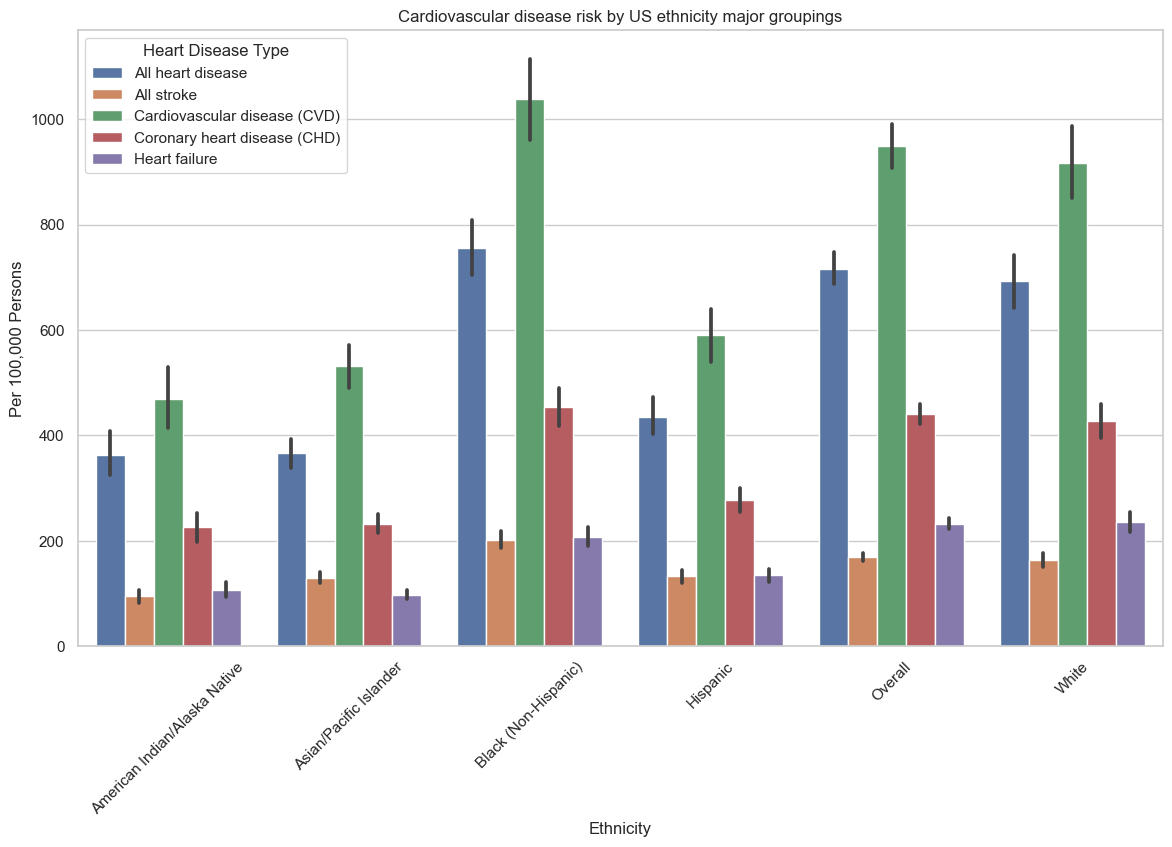

In [6]:
#health cases by ethnicity maybe box plot/barchart? 
#isualize the number of cases of strokes and heart disease by the categories ethnicity gender or age range.
#here i just tested to see if i could make a chart with the data overall 
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x='Ethnicity', y='Data_Value/100_000 People', hue='Heart Disease Type', data=df)


plt.title('Cardiovascular disease risk by US ethnicity major groupings')
plt.xlabel('Ethnicity')
plt.ylabel('Per 100,000 Persons')
plt.xticks(rotation=45)
plt.show()

In [19]:
print(heart_failure_df.head())
print(heart_failure_df.columns)


Empty DataFrame
Columns: [US States, Year, Ethnicity, Gender, Heart Disease Type, Age range, Data_Value/100_000 People]
Index: []
Index(['US States', 'Year', 'Ethnicity', 'Gender', 'Heart Disease Type',
       'Age range', 'Data_Value/100_000 People'],
      dtype='object')


In [20]:
print(df['Heart Disease Type'].unique())


['All heart disease' 'All stroke' 'Cardiovascular disease (CVD)'
 'Coronary heart disease (CHD)' 'Heart failure']


In [ ]:
#filtered barchat
#here i wanted to see if i could grab a specific heart disease and their age range and plot it into a bar chart
df['Heart Disease Type'] = df['Heart Disease Type'].str.strip().str.lower()

heart_failure_df = df[df['Heart Disease Type'] == 'heart failure']  #filter to heart failure 

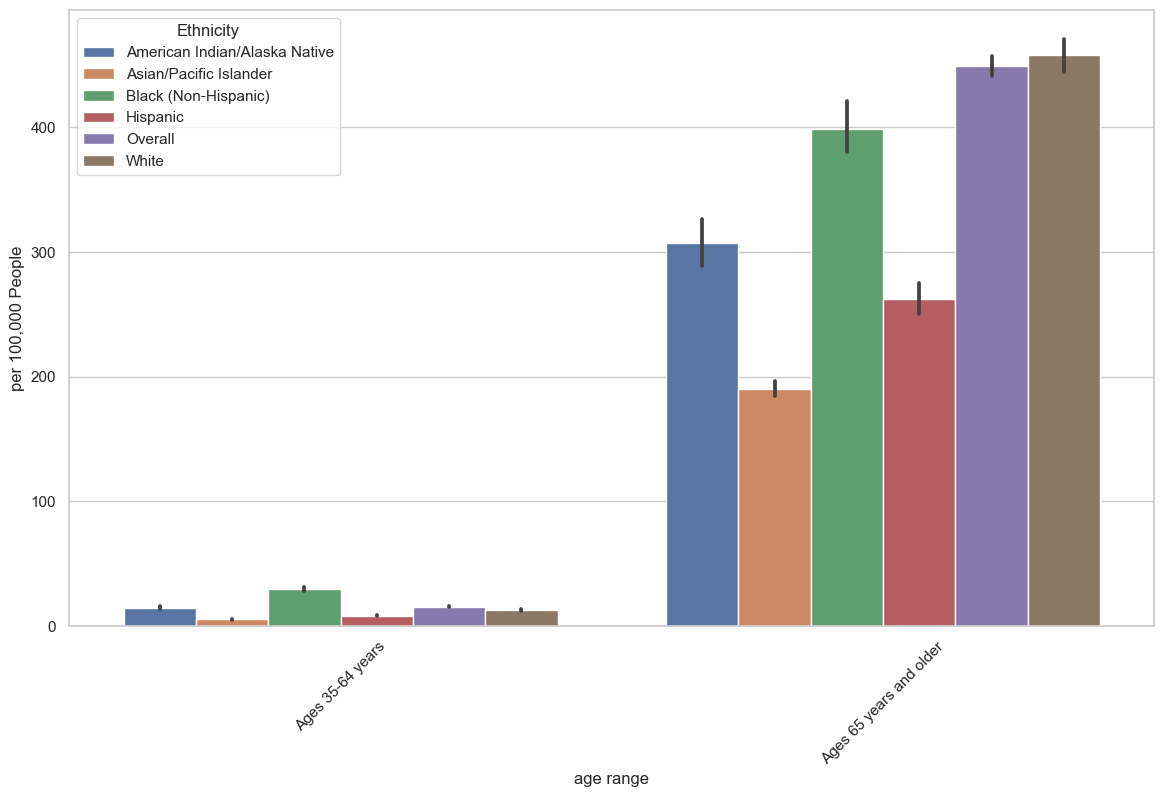

In [24]:

    sns.set(style="whitegrid")
#plot boxplot 
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Age range', y='Data_Value/100_000 People', hue='Ethnicity', data=heart_failure_df)
    plt.xlabel('age range')
    plt.ylabel('per 100,000 People')
    plt.xticks(rotation=45)
    plt.legend(title='Ethnicity')
    plt.show()


In [40]:
#try group by year and average and plot it onto a linechart 
df['Heart Disease Type'] = df['Heart Disease Type'].str.strip().str.lower()



In [41]:
Heart_disease_rename = ['cardiovascular disease (cvd)', 'coronary heart disease (chd)', 'heart failure']
Averaged_grouped_df = df[df['Heart Disease Type'].str.strip().str.lower().isin(Heart_disease_rename)]

In [42]:

Averaged_grouped_df.loc[:, 'Data_Value/100_000 People'] = pd.to_numeric(Averaged_grouped_df['Data_Value/100_000 People'], errors='coerce')

#group by year 
average_by_year = Averaged_grouped_df.groupby('Year')['Data_Value/100_000 People'].mean().reset_index()

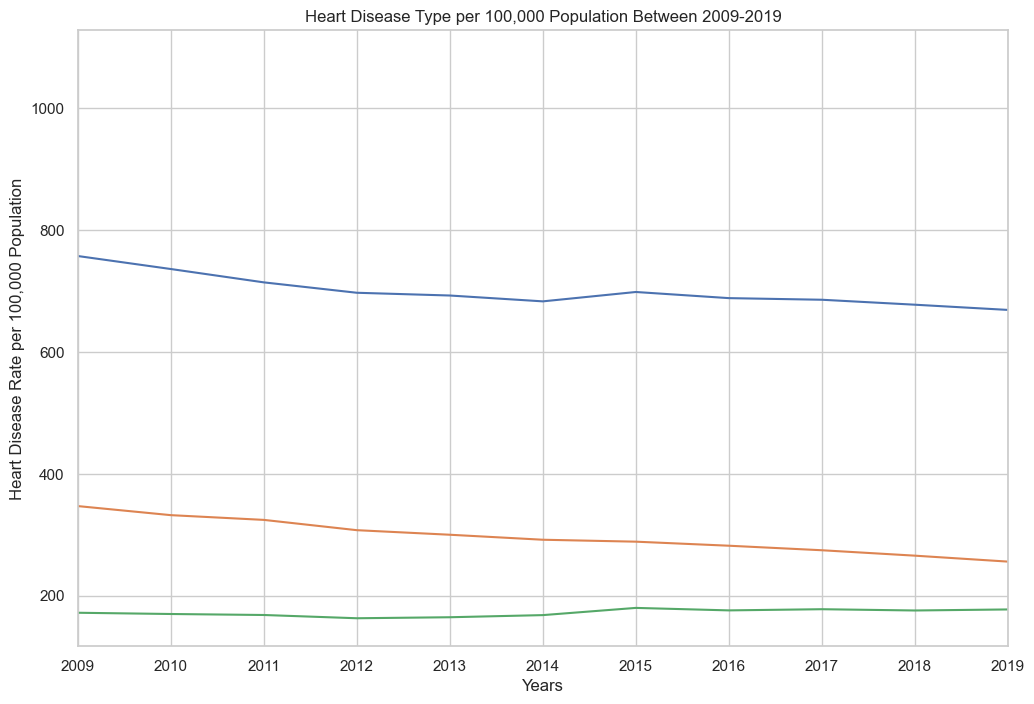

In [43]:
average_by_disease_year = Averaged_grouped_df.groupby(['Heart Disease Type', 'Year'])['Data_Value/100_000 People'].mean().unstack(level=0).reset_index()

#plot the linechart and find the average values 
plt.figure(figsize=(12, 8))

#create a loop through all the diseases and plot each one 
for Heart in Heart_disease_rename:
    Heart_Disease_data = average_by_disease_year.set_index('Year')[Heart]
    plt.plot(Heart_Disease_data.index, Heart_Disease_data, label=Heart)

plt.title('Heart Disease Type per 100,000 Population Between 2009-2019')
plt.xlabel('Years')
plt.ylabel('Heart Disease Rate per 100,000 Population')

plt.grid(True)

#define the limits 
plt.xlim(2009, 2019)
plt.xticks(range(2009, 2020)) #did 2020 because it wouldnt read all through 2019 

plt.show()


In [ ]:
#test with hvplot for the linegraoh 


